In [1]:
import pandas as pd
from helper_functions.game_states_logic import get_play_states
from helper_functions.pull_game_logic import pull_game
import os
from tqdm import tqdm
from collections import Counter
import numpy as np

In [2]:
team_database = pd.read_excel('Team_Names_Abbrs.xlsx')

In [3]:
team_database.head(2)

,id,name,abbreviations,home
0,2427,Colgate,Colg,True
1,302,Weber St.,Weber,False


In [4]:
for filename in os.listdir('raw_game_pulls'):
    teams = filename.split('for ')[1].split('.xlsx')[0]
    team1, team2 = teams.split(' vs ')
    reduce_df = team_database[team_database['name']==team1].copy()
    if len(reduce_df) > 1:
        print('Collision with {}'.format(team1))
    elif len(reduce_df) == 0:
        print('No match for {}'.format(team1))

    reduce_df = team_database[team_database['name']==team2].copy()
    if len(reduce_df) > 1:
        print('Collision with {}'.format(team2))
    elif len(reduce_df) == 0:
        print('No match for {}'.format(team2))
    

In [6]:
xs=[]
ys=[]

num_games = 0

In [7]:
short_lists=[]
for filename in tqdm(os.listdir('raw_game_pulls')[:1]):
    num_games += 1
    xs.append(num_games)
    teams = filename.split('for ')[1].split('.xlsx')[0]
    team1, team2 = teams.split(' vs ')
    team_A = team_database[team_database['name']==team1]['abbreviations'].values[0]
    team_B = team_database[team_database['name']==team2]['abbreviations'].values[0]


    current_data = pd.read_excel('raw_game_pulls/{}'.format(filename))
    
    # print(current_data['PLAY'][0])
    # find_starting_state(current_data, team_A, team_B)
    all_states = get_play_states(current_data, team_A, team_B)
    for i in range(len(all_states)):
        short_lists.append([x for x in all_states[i] if x != 'UNNEC'])

    list_of_pairs = []
    for j in short_lists:
        list_of_pairs += [tuple(j[x:x+2]) for x in range(len(j)-1)]

    all_counts = Counter(list_of_pairs)
    new_y = len(pd.DataFrame(zip(all_counts.keys(),all_counts.values()), columns = ['Transition','Count']))
    ys.append(new_y)

    if 'MISSED ALL LOGIC' in all_states:
        raise Exception
    # short_list += [x for x in all_states if x != 'UNNEC']


100%|██████████| 1/1 [00:00<00:00, 31.89it/s]


In [14]:
filename

'6197002_Play-By-Play for Colgate vs Weber St..xlsx'

In [17]:
#going to save down a sample game into states and times
final_game = pd.DataFrame()
for i in range(len(all_states)):
    half_tuples = all_states[i]
    smaller_list = [x for x in half_tuples if x[0] != 'UNNEC']
    curr_half = pd.DataFrame(smaller_list, columns = ['State','Time'])
    curr_half['Period']=i+1
    final_game = pd.concat([final_game,curr_half])

In [20]:
final_game.to_excel('games_with_states/{}'.format(filename), index=False)

In [22]:
#that worked, so going to do it with all games?
for filename in tqdm(os.listdir('raw_game_pulls')):
    num_games += 1
    xs.append(num_games)
    teams = filename.split('for ')[1].split('.xlsx')[0]
    team1, team2 = teams.split(' vs ')
    team_A = team_database[team_database['name']==team1]['abbreviations'].values[0]
    team_B = team_database[team_database['name']==team2]['abbreviations'].values[0]


    current_data = pd.read_excel('raw_game_pulls/{}'.format(filename))

    all_states = get_play_states(current_data, team_A, team_B)
    final_game = pd.DataFrame()
    for i in range(len(all_states)):
        half_tuples = all_states[i]
        smaller_list = [x for x in half_tuples if x[0] != 'UNNEC']
        curr_half = pd.DataFrame(smaller_list, columns = ['State','Time'])
        curr_half['Period']=i+1
        final_game = pd.concat([final_game,curr_half])
    final_game.to_excel('games_with_states/{}'.format(filename), index=False)

  0%|          | 0/3656 [00:00<?, ?it/s]

100%|██████████| 3656/3656 [03:37<00:00, 16.83it/s]


In [7]:
from matplotlib import pyplot as plt

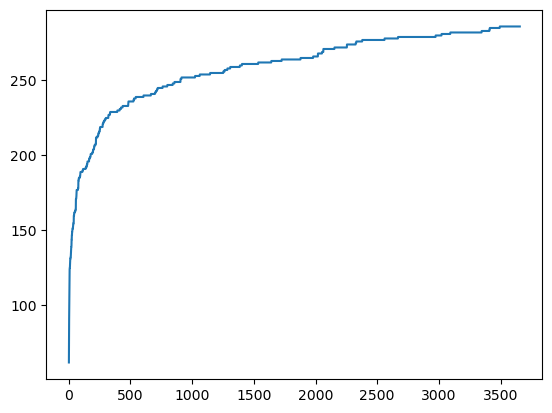

In [9]:
plt.plot(xs,ys)

In [16]:
list_of_pairs = []
for j in short_lists:
    list_of_pairs += [tuple(j[x:x+2]) for x in range(len(j)-1)]

In [17]:
all_counts = Counter(list_of_pairs)

In [18]:
pd.DataFrame(zip(all_counts.keys(),all_counts.values()), columns = ['Transition','Count'])

,Transition,Count
0,"(Bi0, Ai3)",1935
1,"(Ai3, Ar0)",2949
2,"(Ar0, Ar0)",22072
3,"(Ar0, Br0)",61507
4,"(Br0, Ar0)",63052
...,...,...
281,"(Bf1, Ai3)",1
282,"(Bi1, Af3)",1
283,"(Bf0, Bf3)",1
284,"(Af2, Bi3)",1


In [158]:
#first 5 games provide 109 unique transitions
#first 10 games provide 132 unique transitions
#first 20 games provide 149 unique transitions
#first 30 games provide 161 unique transitions
#first 40 games provide 176 unique transitions
#first 50 games provide 180 unique transitions
#first 100 games provide 201 unique transitions
#first 200 games provide 207 unique transitions
#first 400 games provide 233 unique transitions
#firts 2000 games provide 265 unique transitions
#all games provide 286 unique transitions - this is still true after halftimes accounted for...
#BUT - many of them are probably invalid - need to make sure halftime transitions aren't possible

In [15]:
len(short_lists)

7317